In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=10
df=pd.read_csv('D:/Gabriel/1.csv',sep=',')
df.shape

(28201, 9)

In [2]:
df.head(5)

,小区名称,户型,面积,区域,楼层,朝向,价格（W）,单价（平方米）,建筑时间
0,梅园六街坊,2室0厅,47.72,浦东,低区/6层,朝南,500,104777,1992年建
1,碧云新天地（一期）,3室2厅,108.93,浦东,低区/6层,朝南,735,67474,2002年建
2,博山小区,1室1厅,43.79,浦东,中区/6层,朝南,260,59374,1988年建
3,金桥新村四街坊（博兴路986弄）,1室1厅,41.66,浦东,中区/6层,朝南北,280,67210,1997年建
4,博山小区,1室0厅,39.77,浦东,高区/6层,朝南,235,59089,1987年建


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28201 entries, 0 to 28200
Data columns (total 9 columns):
小区名称       28201 non-null object
户型         28201 non-null object
面积         28201 non-null float64
区域         28201 non-null object
楼层         28201 non-null object
朝向         26846 non-null object
价格（W）      28201 non-null int64
单价（平方米）    28201 non-null int64
建筑时间       21985 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 1.9+ MB


In [4]:
df.describe()

,面积,价格（W）,单价（平方米）
count,28201.000000,28201.000000,28201.000000
mean,96.218136,580.274458,59725.836034
std,60.819286,486.980354,21039.354067
min,21.110000,50.000000,8996.000000
25%,58.870000,315.000000,44943.000000
50%,85.410000,430.000000,58068.000000
75%,116.150000,700.000000,71740.000000
max,1832.580000,11200.000000,199639.000000


In [5]:
df.corr()

,面积,价格（W）,单价（平方米）
面积,1.000000,0.789856,0.043756
价格（W）,0.789856,1.000000,0.530081
单价（平方米）,0.043756,0.530081,1.000000


([<matplotlib.patches.Wedge at 0x24c33f9f4e0>,
 [Text(-0.7717660508013289, 0.9188999743337253, '2室2厅'),
  Text(-1.0402094159449202, -0.5983012376550194, '2室1厅'),
  Text(0.38463803558274223, -1.1366853485389214, '3室2厅'),
  Text(1.0849522876515747, -0.18132438754788396, '1室1厅'),
  Text(1.0252878999262067, 0.3984780072537363, '3室1厅'),
  Text(0.8843909369278123, 0.6541044799418104, '4室2厅'),
  Text(0.6920413146323475, 0.8550314724277301, '1室0厅'),
  Text(0.4717761230737158, 0.9936937605205813, '2室0厅'),
  Text(0.1809013669122273, 1.0850229008870218, 'other')],
 [Text(-0.45019686296744177, 0.5360249850280063, '22.2%'),
  Text(-0.6067888259678701, -0.34900905529876125, '22.1%'),
  Text(0.22437218742326628, -0.6630664533143709, '21.6%'),
  Text(0.5917921569008588, -0.09890421138975487, '12.7%'),
  Text(0.5592479454142946, 0.21735164032021975, '4.4%'),
  Text(0.4823950565060794, 0.356784261786442, '4.1%'),
  Text(0.3774770807085531, 0.4663808031423982, '4.0%'),
  Text(0.2573324307674813, 0.542014

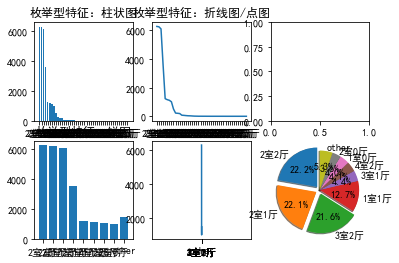

In [162]:
#枚举型特征,用柱状图
a=df['户型'].value_counts()
plt.subplot(2,3,1)
plt.bar(df['户型'].value_counts().index,df['户型'].value_counts().values)
plt.title('枚举型特征：柱状图')
plt.subplot(2,3,2)
plt.plot(df['户型'].value_counts())
plt.title('枚举型特征：折线图/点图')
plt.subplot(2,3,3)
#plt.pie(a1.values,explode=[0.1,0.1,0.1,0,0,0,0,0,0],labels=a1.index,autopct='%.1f%%',shadow=True,startangle=90)
a1=a[a.values>1000]
a1.index.insert(8,'其他')
a1['other']=sum(a[a.values<=1000])
plt.subplot(2,3,4)
plt.bar(a1.index,a1.values)
plt.title('枚举型特征：饼图')
plt.subplot(2,3,5)
plt.plot(a1)
plt.axis('equal')#正圆形
plt.subplot(2,3,6)
plt.pie(a1.values,explode=[0.1,0.1,0.1,0,0,0,0,0,0],labels=a1.index,autopct='%.1f%%',shadow=True,startangle=90)

300.00     3
300.04     1
300.24     1
301.23     1
301.44     1
          ..
830.66     3
845.48     1
865.89     1
935.02     1
1832.58    1
Name: 面积, Length: 371, dtype: int64

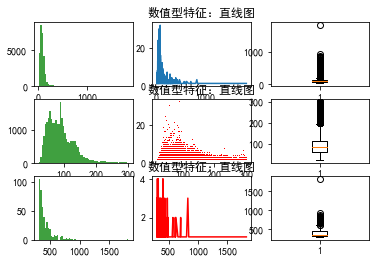

In [92]:
plt.subplot(3,3,1)
plt.hist(df['面积'],60,histtype='stepfilled',facecolor='g',alpha=0.75)
plt.subplot(3,3,2)
plt.plot(df['面积'].value_counts().sort_index())
plt.title('数值型特征：直线图')
plt.subplot(3,3,3)
plt.boxplot(df['面积'])
mj=df['面积'][df['面积']<300]
plt.subplot(3,3,4)
plt.hist(mj,60,histtype='stepfilled',facecolor='g',alpha=0.75)
plt.subplot(3,3,5)
plt.plot(mj.value_counts().sort_index(),'r,')
plt.title('数值型特征：直线图')
plt.subplot(3,3,6)
plt.boxplot(mj)

mj1=df['面积'][df['面积']>=300]
plt.subplot(3,3,7)
plt.hist(mj1,60,histtype='stepfilled',facecolor='g',alpha=0.75)
plt.subplot(3,3,8)
plt.plot(mj1.value_counts().sort_index(),'r-')
plt.title('数值型特征：直线图')
plt.subplot(3,3,9)
plt.boxplot(mj1)
mj1.value_counts().sort_index()



{'whiskers': [<matplotlib.lines.Line2D at 0x24c1d17bd68>,
 'caps': [<matplotlib.lines.Line2D at 0x24c1d189748>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c1d17bc18>],
 'medians': [<matplotlib.lines.Line2D at 0x24c1d189dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c1d189da0>],
 'means': []}

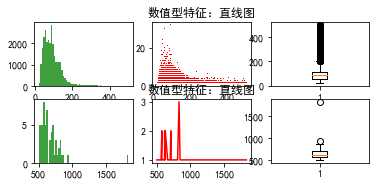

In [98]:
mj2=df['面积'][df['面积']<500]
plt.subplot(3,3,1)
plt.hist(mj2,60,histtype='stepfilled',facecolor='g',alpha=0.75)
plt.subplot(3,3,2)
plt.plot(mj2.value_counts().sort_index(),'r,')
plt.title('数值型特征：直线图')
plt.subplot(3,3,3)
plt.boxplot(mj2)

mj3=df['面积'][df['面积']>=500]
plt.subplot(3,3,4)
plt.hist(mj3,60,histtype='stepfilled',facecolor='g',alpha=0.75)
plt.subplot(3,3,5)
plt.plot(mj3.value_counts().sort_index(),'r-')
plt.title('数值型特征：直线图')
plt.subplot(3,3,6)
plt.boxplot(mj3)

(-1.1417935007974245,
 1.1357020799402495,
 -1.2182627445182754,
 1.2028425223943109)

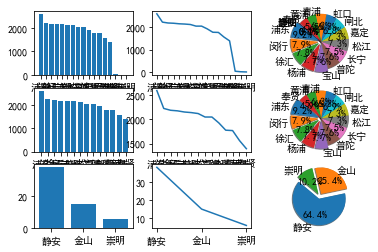

In [99]:
plt.subplot(3,3,1)
plt.bar(df['区域'].value_counts().index,df['区域'].value_counts().values)
plt.subplot(3,3,2)
plt.plot(df['区域'].value_counts())
plt.subplot(3,3,3)
plt.pie(df['区域'].value_counts().values,
        explode=[0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0],labels=df['区域'].value_counts().index,
        autopct='%.1f%%',shadow=True,
        startangle=140)
plt.axis('equal')#正圆形

plt.subplot(3,3,4)
qy=df['区域'].value_counts()[df['区域'].value_counts()>1000]
plt.bar(qy.index,qy.values)
plt.subplot(3,3,5)
plt.plot(qy)
plt.subplot(3,3,6)
plt.pie(qy.values,
        explode=[0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0],labels=qy.index,
        autopct='%.1f%%',shadow=True,
        startangle=140)
plt.axis('equal')#正圆形


plt.subplot(3,3,7)
qy1=df['区域'].value_counts()[df['区域'].value_counts()<1000]
plt.bar(qy1.index,qy1.values)
plt.subplot(3,3,8)
plt.plot(qy1)
plt.subplot(3,3,9)
plt.pie(qy1.values,
        explode=[0.1,0.1,0.1],labels=qy1.index,
        autopct='%.1f%%',shadow=True,
        startangle=140)
plt.axis('equal')#正圆形

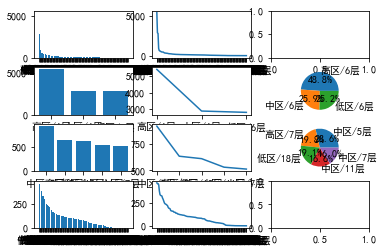

In [111]:
lc=df['楼层'].value_counts()
plt.subplot(4,3,1)
plt.bar(lc.index,lc.values)
plt.subplot(4,3,2)
plt.plot(lc)
plt.subplot(4,3,3)
#plt.pie(lc.values,labels=lc.index,autopct='%.1f%%')

lc1=df['楼层'].value_counts()[df['楼层'].value_counts()>1000]
plt.subplot(4,3,4)
plt.bar(lc1.index,lc1.values)
plt.subplot(4,3,5)
plt.plot(lc1)
plt.subplot(4,3,6)
plt.pie(lc1.values,labels=lc1.index,autopct='%.1f%%')

lc2=df['楼层'].value_counts()[(df['楼层'].value_counts()<=1000)&(df['楼层'].value_counts()>500)]
plt.subplot(4,3,7)
plt.bar(lc2.index,lc2.values)
plt.subplot(4,3,8)
plt.plot(lc2)
plt.subplot(4,3,9)
plt.pie(lc2.values,labels=lc2.index,autopct='%.1f%%')


lc3=df['楼层'].value_counts()[df['楼层'].value_counts()<=500]
plt.subplot(4,3,10)
plt.bar(lc3.index,lc3.values)
plt.subplot(4,3,11)
plt.plot(lc3)
plt.subplot(4,3,12)
#plt.pie(lc3.values,labels=lc3.index,autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x24b83658cf8>,
 [Text(0.21802646105883738, 1.0781764522925545, '朝南北'),
  Text(-0.6243868733067601, -0.9056163826048026, '朝南'),
  Text(0.8228502620679433, -0.7300119493643354, '朝'),
  Text(0.9298193203469222, -0.5877380636895895, '朝东南'),
  Text(1.007370163114298, -0.44182050027932485, '朝西南'),
  Text(1.0536720902507182, -0.3158720092484974, '朝北'),
  Text(1.0779668092636734, -0.21906062659888365, '朝东'),
  Text(1.0913756889294088, -0.13747401795924352, '(进门) 南'),
  Text(1.0977961440405257, -0.06959616461956337, '朝西'),
  Text(1.099812461303555, -0.02031132593940097, '朝西北')])

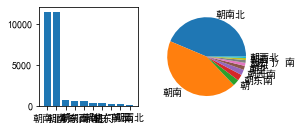

In [49]:
plt.bar(df['朝向'].value_counts().index,df['朝向'].value_counts().values)
d=df['朝向'].value_counts()
d1=d[d>d.median()]
plt.subplot(2,3,1)
plt.bar(d1.index,d1.values)
plt.subplot(2,3,2)
plt.pie(d1.values,labels=d1.index)

l1=l[l.cumsum()<l.sum()*0.6]
plt.subplot(2,3,4)
plt.bar(l1.index,l1.values)
plt.subplot(2,3,5)
plt.pie(l1.values,labels=l1.index)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c1afc9da0>,
 'caps': [<matplotlib.lines.Line2D at 0x24c1afd54e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c1afc99b0>],
 'medians': [<matplotlib.lines.Line2D at 0x24c1afd5b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c1afd5eb8>],
 'means': []}

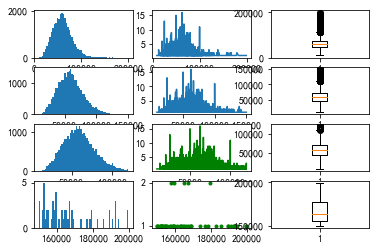

In [91]:
plt.subplot(4,3,1)
plt.hist(df['单价（平方米）'],60)
plt.subplot(4,3,2)
plt.plot(df['单价（平方米）'].value_counts().sort_index())
plt.subplot(4,3,3)
plt.boxplot(df['单价（平方米）'])
plt.subplot(4,3,4)
dj=df['单价（平方米）'][df['单价（平方米）']<150000]
plt.hist(dj,60)
plt.subplot(4,3,5)
plt.plot(dj.value_counts().sort_index())
plt.subplot(4,3,6)
plt.boxplot(dj)
plt.subplot(4,3,7)
dj1=df['单价（平方米）'][df['单价（平方米）']<120000]
plt.hist(dj1,60)
plt.subplot(4,3,8)
plt.plot(dj1.value_counts().sort_index(),'g-')
plt.subplot(4,3,9)
plt.boxplot(dj1)

plt.subplot(4,3,10)
dj2=df['单价（平方米）'][df['单价（平方米）']>=150000]
plt.hist(dj2,60)
plt.subplot(4,3,11)
plt.plot(dj2.value_counts().sort_index(),'g.')
plt.subplot(4,3,12)
plt.boxplot(dj2)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c07badba8>,
 'caps': [<matplotlib.lines.Line2D at 0x24c07badeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c07bad5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x24c07b9e908>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c07b9ec50>],
 'means': []}

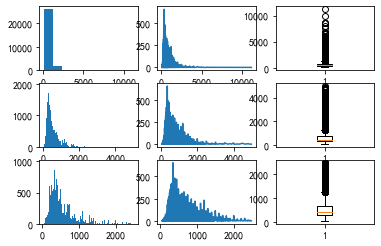

In [61]:
plt.subplot(3,3,1)
plt.hist(df['价格（W）'])
plt.subplot(3,3,2)
plt.plot(df['价格（W）'].value_counts().sort_index())
plt.subplot(3,3,3)
plt.boxplot(df['价格（W）'])
p=df['价格（W）'][df['价格（W）']<5000]
plt.subplot(3,3,4)
plt.hist(p,200)
plt.subplot(3,3,5)
plt.plot(p.value_counts().sort_index())
plt.subplot(3,3,6)
plt.boxplot(p)
p1=df['价格（W）'][df['价格（W）']<2500]
plt.subplot(3,3,7)
plt.hist(p1,200)
plt.subplot(3,3,8)
plt.plot(p1.value_counts().sort_index())
plt.subplot(3,3,9)
plt.boxplot(p1)

In [8]:
df1=df[~df['区域'].isin(['崇明','金山','静安'])] 

In [9]:
grouped1 = df1[['价格（W）','单价（平方米）']].groupby(df1['区域']).mean()
grouped1=grouped1.sort_values('单价（平方米）',axis=0,ascending=True)

In [11]:
grouped1

,价格（W）,单价（平方米）
区域,,
奉贤,301.519024,29845.478105
青浦,676.012436,39898.863200
嘉定,373.865366,41137.227317
松江,492.597561,41705.022927
宝山,427.021356,50078.485608
闵行,536.133303,54429.949282
浦东,571.785302,62804.779915
普陀,559.083100,64490.110177
杨浦,520.864096,65448.101010


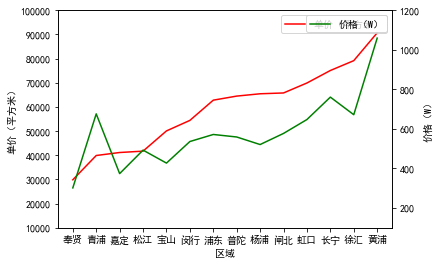

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(grouped1['单价（平方米）'], 'r-', label = '单价（平方米）')
ax.set_ylim(10000,100000)
ax.set_xlabel("区域")
ax.set_ylabel(r"单价（平方米）")
ax2 = ax.twinx()
ax2.plot(grouped1['价格（W）'],'g-', label = '价格（W）')
ax.legend(loc=0)
#ax.grid()
ax2.set_ylabel(r"价格（W）")
ax2.set_ylim(100, 1200)
ax2.legend(loc=0)
#plt.savefig('0.png')

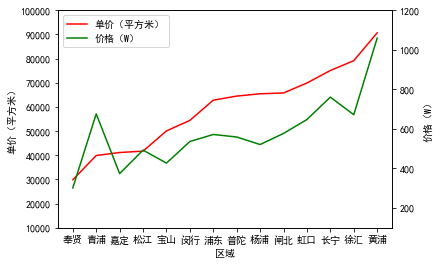

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
lns1=ax.plot(grouped1['单价（平方米）'], 'r-', label = '单价（平方米）')
ax.set_ylim(10000,100000)
ax.set_xlabel("区域")
ax.set_ylabel(r"单价（平方米）")
ax2 = ax.twinx()
lns2=ax2.plot(grouped1['价格（W）'],'g-', label = '价格（W）')
#ax.legend(loc=0)
#ax.grid()
ax2.set_ylabel(r"价格（W）")
ax2.set_ylim(100, 1200)
#ax2.legend(loc=0)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

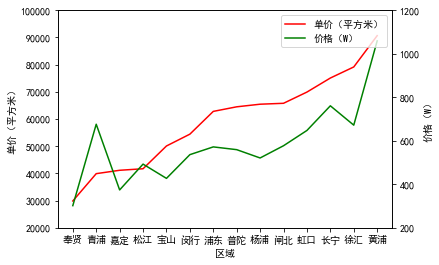

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111)
lns1=ax.plot(grouped1['单价（平方米）'], 'r-', label = '单价（平方米）')
ax.set_ylim(20000,100000)
ax.set_xlabel("区域")
ax.set_ylabel(r"单价（平方米）")
ax2 = ax.twinx()
lns2=ax2.plot(grouped1['价格（W）'],'g-', label = '价格（W）')
#ax.legend(loc=0)
#ax.grid()
ax2.set_ylabel(r"价格（W）")
ax2.set_ylim(200, 1200)
#ax2.legend(loc=0)


fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

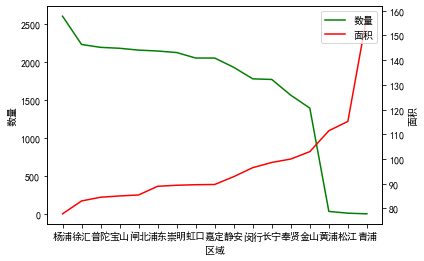

In [14]:
grouped2 = df[['面积']].groupby(df['区域']).mean()
grouped2=grouped2.sort_values('面积',axis=0,ascending=True)
fig = plt.figure()
ax = fig.add_subplot(111)
lns1=ax.plot(df['区域'].value_counts(), 'g-', label = '数量')
ax.set_ylabel(r"数量")
ax.set_xlabel("区域")
ax2 = ax.twinx()
lns2=ax2.plot(grouped2, 'r-', label = '面积')
#ax.set_ylim(10000,100000)
ax2.set_ylabel(r"面积")
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

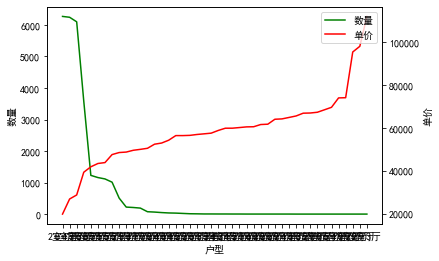

In [175]:
grouped3 = df[['单价（平方米）']].groupby(df['户型']).mean()
grouped3=grouped3.sort_values('单价（平方米）',axis=0,ascending=True)
fig = plt.figure()
ax = fig.add_subplot(111)
lns1=ax.plot(df['户型'].value_counts(), 'g-', label = '数量')
ax.set_ylabel(r"数量")
ax.set_xlabel("户型")
ax2 = ax.twinx()
lns2=ax2.plot(grouped3, 'r-', label = '单价')
#ax.set_ylim(10000,100000)
ax2.set_ylabel(r"单价")
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [15]:
a=list(df['户型'].value_counts()[df['户型'].value_counts()<500].index)
df['户型']
df[df['户型'].isin (a)] 

,小区名称,户型,面积,区域,楼层,朝向,价格（W）,单价（平方米）,建筑时间
120,上南二村,3室0厅,65.61,浦东,高区/6层,朝南,425,64776,1989年建
233,明丰花园,5室2厅,125.78,浦东,低区/6层,朝南北,770,61217,2003年建
241,东旺名苑,4室3厅,76.80,浦东,高区/6层,朝南,650,84635,2010年建
360,潍坊七村,3室0厅,68.93,浦东,中区/6层,NaN,570,82692,1983年建
467,城市经典（一期）（公寓）,3室3厅,186.13,浦东,中区/5层,朝南北,1300,69843,2003年建
...,...,...,...,...,...,...,...,...,...
28132,绿地香颂（奉贤）（别墅）,5室2厅,268.80,奉贤,地上3层,(进门),550,20461,2007年建
28136,金都雅苑（别墅）,5室3厅,208.17,奉贤,地上1层,(进门) 南北,850,40832,2005年建
28137,景河苑（别墅）,5室3厅,277.24,奉贤,地上3层,(进门) 南北,1600,57711,2004年建
28159,鸿宝二村别墅,5室2厅,188.10,奉贤,地上2层,(进门) 南北,680,36150,1994年建


In [16]:
df2=df1
df2.loc[df2['户型'].isin(a),'户型']='其他'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
df2['户型'].value_counts()

2室2厅    6253
2室1厅    6236
3室2厅    6085
1室1厅    3581
3室1厅    1227
4室2厅    1157
1室0厅    1112
2室0厅    1009
其他       975
1室2厅     507
Name: 户型, dtype: int64

In [18]:
df2.shape

(28142, 9)

In [19]:
df.shape

(28201, 9)

In [20]:
df2['户型'].value_counts()

2室2厅    6253
2室1厅    6236
3室2厅    6085
1室1厅    3581
3室1厅    1227
4室2厅    1157
1室0厅    1112
2室0厅    1009
其他       975
1室2厅     507
Name: 户型, dtype: int64

In [21]:
df2.loc[df2['户型'].isin (['其他'])]

,小区名称,户型,面积,区域,楼层,朝向,价格（W）,单价（平方米）,建筑时间
120,上南二村,其他,65.61,浦东,高区/6层,朝南,425,64776,1989年建
233,明丰花园,其他,125.78,浦东,低区/6层,朝南北,770,61217,2003年建
241,东旺名苑,其他,76.80,浦东,高区/6层,朝南,650,84635,2010年建
360,潍坊七村,其他,68.93,浦东,中区/6层,NaN,570,82692,1983年建
467,城市经典（一期）（公寓）,其他,186.13,浦东,中区/5层,朝南北,1300,69843,2003年建
...,...,...,...,...,...,...,...,...,...
28132,绿地香颂（奉贤）（别墅）,其他,268.80,奉贤,地上3层,(进门),550,20461,2007年建
28136,金都雅苑（别墅）,其他,208.17,奉贤,地上1层,(进门) 南北,850,40832,2005年建
28137,景河苑（别墅）,其他,277.24,奉贤,地上3层,(进门) 南北,1600,57711,2004年建
28159,鸿宝二村别墅,其他,188.10,奉贤,地上2层,(进门) 南北,680,36150,1994年建


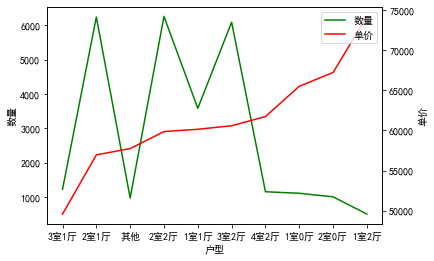

In [67]:
grouped4 = df2[['单价（平方米）']].groupby(df2['户型']).mean()
grouped4=grouped4.sort_values('单价（平方米）',axis=0,ascending=True)
lc=df2['户型'].value_counts()
lc.name='数量'
pdlc=pd.merge(lc, grouped4, how='inner', on=None, left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
pdlc=pdlc.sort_values('单价（平方米）',axis=0,ascending=True)

fig = plt.figure()
ax = fig.add_subplot(111)
lns1=ax.plot(pdlc['数量'], 'g-', label = '数量')
ax.set_ylabel(r"数量")
ax.set_xlabel("户型")
ax2 = ax.twinx()
lns2=ax2.plot(pdlc['单价（平方米）'], 'r-', label = '单价')
#ax.set_ylim(10000,100000)
ax2.set_ylabel(r"单价")
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

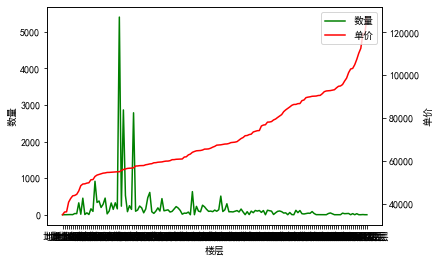

In [66]:
grouped4 = df2[['单价（平方米）']].groupby(df2['楼层']).mean()
grouped4=grouped4.sort_values('单价（平方米）',axis=0,ascending=True)
lc=df2['楼层'].value_counts()
lc.name='数量'
pdlc=pd.merge(lc, grouped4, how='inner', on=None, left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
pdlc=pdlc.sort_values('单价（平方米）',axis=0,ascending=True)

fig = plt.figure()
ax = fig.add_subplot(111)
lns1=ax.plot(pdlc['数量'], 'g-', label = '数量')
ax.set_ylabel(r"数量")
ax.set_xlabel("楼层")
ax2 = ax.twinx()
lns2=ax2.plot(pdlc['单价（平方米）'], 'r-', label = '单价')
#ax.set_ylim(10000,100000)
ax2.set_ylabel(r"单价")
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [259]:
df2.columns

Index(['小区名称', '户型', '面积', '区域', '楼层', '朝向', '价格（W）', '单价（平方米）', '建筑时间'], dtype='object')

In [260]:
df2['区域'].value_counts()

浦东    2599
闵行    2228
徐汇    2190
杨浦    2178
宝山    2154
普陀    2142
长宁    2122
松江    2050
嘉定    2050
闸北    1928
虹口    1777
青浦    1769
黄浦    1562
奉贤    1393
Name: 区域, dtype: int64

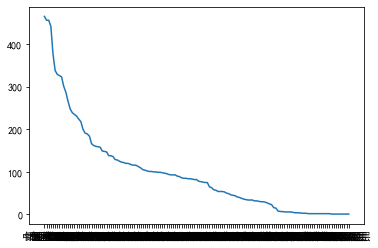

In [263]:
lc3=df['楼层'].value_counts()[df['楼层'].value_counts()<=500]
plt.plot(lc3)

In [264]:
df2['楼层'].value_counts()

高区/6层     5404
中区/6层     2866
低区/6层     2788
中区/5层      916
高区/7层      633
          ... 
高区/44层       1
低区/49层       1
低区/44层       1
低区/56层       1
高区/59层       1
Name: 楼层, Length: 151, dtype: int64

In [272]:
df2['楼层'].value_counts()[df2['楼层'].value_counts()<=100]

低区/10层    100
高区/15层    100
低区/26层     99
中区/30层     99
中区/25层     97
         ... 
高区/44层      1
低区/49层      1
低区/44层      1
低区/56层      1
高区/59层      1
Name: 楼层, Length: 92, dtype: int64

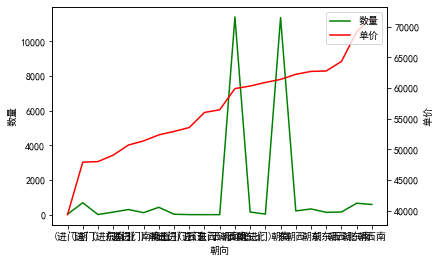

In [60]:
grouped4 = df2[['单价（平方米）']].groupby(df2['朝向']).mean()
grouped4=grouped4.sort_values('单价（平方米）',axis=0,ascending=True)
cx=df2['朝向'].value_counts()
cx.name='数量'
#grouped4=pd.Series(grouped4['单价（平方米）'],index=grouped4.index)
pdcx=pd.merge(cx, grouped4, how='inner', on=None, left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
pdcx=pdcx.sort_values('单价（平方米）',axis=0,ascending=True)
fig = plt.figure()
ax = fig.add_subplot(111)
lns1=ax.plot(pdcx['数量'], 'g-', label = '数量')
ax.set_ylabel(r"数量")
ax.set_xlabel("朝向")
ax2 = ax.twinx()
lns2=ax2.plot(pdcx['单价（平方米）'], 'r-', label = '单价')
#ax.set_ylim(10000,100000)
ax2.set_ylabel(r"单价")
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [71]:
df2.loc[df2['朝向'].isin(['（进门）','朝']),['朝向']]= None

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


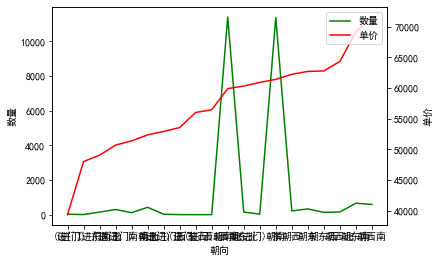

In [73]:
grouped4 = df2[['单价（平方米）']].groupby(df2['朝向']).mean()
grouped4=grouped4.sort_values('单价（平方米）',axis=0,ascending=True)
cx=df2['朝向'].value_counts()
cx.name='数量'
#grouped4=pd.Series(grouped4['单价（平方米）'],index=grouped4.index)
pdcx=pd.merge(cx, grouped4, how='inner', on=None, left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
pdcx=pdcx.sort_values('单价（平方米）',axis=0,ascending=True)
fig = plt.figure()
ax = fig.add_subplot(111)
lns1=ax.plot(pdcx['数量'], 'g-', label = '数量')
ax.set_ylabel(r"数量")
ax.set_xlabel("朝向")
ax2 = ax.twinx()
lns2=ax2.plot(pdcx['单价（平方米）'], 'r-', label = '单价')
#ax.set_ylim(10000,100000)
ax2.set_ylabel(r"单价")
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [76]:
df2['朝向'].value_counts()

朝南北        11412
朝南         11374
朝东南          661
朝西南          589
朝北           425
朝东           330
(进门) 南       297
朝西           218
朝西北          154
朝东北          151
(进门) 北       148
朝东西          134
(进门) 南北      116
(进门) 东        32
(进门)          25
(进门) 西        25
(进门) 东南        7
(进门) 东西        3
(进门) 西南        2
(进门) 西北        1
Name: 朝向, dtype: int64

In [273]:
lc=df2['楼层'].value_counts()[df2['楼层'].value_counts()>100].sort_values()

In [ ]:
df2.loc[df2['楼层'].value_counts()>2000,'楼层']='6层'

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X=df[['户型','区域','楼层','朝向']]
y=df['单价（平方米）']
X=pd.get_dummies(X, prefix=None, prefix_sep='_', dummy_na=False, 
               columns=None, sparse=False, drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=0)
regr = RandomForestRegressor(max_depth=2, random_state=0,
n_estimators=100)
regr.fit(X_train,y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [ ]:
#数据中的属于不同类别的样本的分布是不平衡的。 这里我们选择过采样的方法来使数据变得平衡。
#在Python中imbalanced-learn包可以用来对不平衡数据进行处理。
from imblearn.over_sampling import RandomOverSampler
X = df.iloc[:,:-1].valuesy = df['quality'].values
ros = RandomOverSampler()X, y = ros.fit_sample(X, y)